In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# generate a simple, syntheic classification dataset

X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (500, 2)
Shape of y: (500,)


In [10]:
X[:5]

array([[ 1.00845498, -1.04700975],
       [ 0.32602138,  0.50254097],
       [ 1.02420498, -1.79714286],
       [ 0.12188007,  1.05937142],
       [ 0.03909973,  0.38236937]])

In [11]:
y[:5]

array([0, 1, 0, 0, 1])

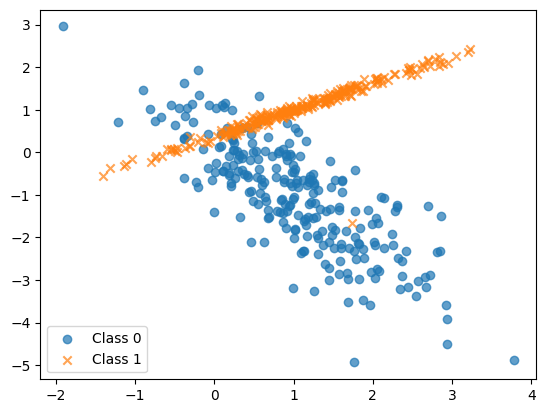

In [19]:
plt.figure()
for label, marker in zip([0, 1], ['o', 'x']):
    plt.scatter(
        X[y == label, 0],
        X[y == label, 1],
        marker=marker,
        label=f"Class {label}",
        alpha=0.7
    )
plt.legend()
plt.show()

In [12]:
# split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 400
Test set size: 100


In [13]:
# create and train the model

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [[0.25499708 2.16385589]]
Model intercept: [-0.61169411]


In [17]:
print("X:", X[:1], "y:", y[:1])

X: [[ 1.00845498 -1.04700975]] y: [0]


In [32]:
# evaluate on the training set

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

print("\nTraining Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.8675

Training Confusion Matrix:
[[167  32]
 [ 21 180]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       199
           1       0.85      0.90      0.87       201

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [30]:
# evaluate on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.3f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on the test set: 0.890

Confusion Matrix:
[[42  8]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.85      0.94      0.90        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [22]:
# use the trained model for new predictions

new_points = np.array([
    [2, 1],
    [1, -1],
])

predictions = model.predict(new_points)
for point, pred in zip(new_points, predictions):
    print(f"Point {point} predicted class: {pred}")

Point [2 1] predicted class: 1
Point [ 1 -1] predicted class: 0


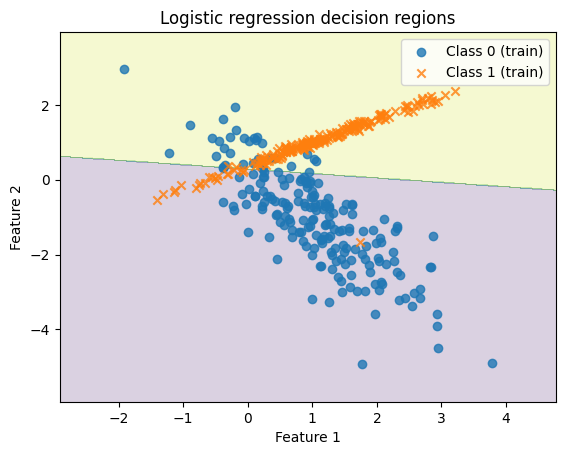

In [23]:
# Visualise the decision boundary of the trained logistic regression model

# Step 1: create a grid of points covering the feature space
h = 0.02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Step 2: get model predictions on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Step 3: plot decision regions and training points
plt.figure()

# Decision regions
plt.contourf(xx, yy, Z, alpha=0.2)

# Training points
for label, marker in zip([0, 1], ["o", "x"]):
    plt.scatter(
        X_train[y_train == label, 0],
        X_train[y_train == label, 1],
        marker=marker,
        label=f"Class {label} (train)",
        alpha=0.8,
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic regression decision regions")
plt.legend()
plt.show()